In [20]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['figure.dpi'] = 500
plt.rcParams['text.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.edgecolor'] = 'w'
plt.rcParams['figure.facecolor'] = 'k'
plt.rcParams['axes.facecolor'] = 'k'
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LogNorm
from matplotlib.patches import FancyArrowPatch
import matplotlib.colors as colors
from astropy.visualization import SqrtStretch, LinearStretch, LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import pandas as pd
import re
from astropy.io import fits
import os
from scipy.ndimage import map_coordinates
from scipy.stats import binned_statistic
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
from pathlib import Path
from scipy.stats import gaussian_kde
import seaborn as sns
import plotly.graph_objects as go
from scipy.interpolate import griddata

from matplotlib.lines import Line2D
os.chdir("/Users/ainsleylewis/Documents/Astronomy/IllustrisTNG Lens Modelling")

In [29]:
df = pd.read_csv('/Volumes/T7 Shield/Simulation Output/System 1/Sim 1.csv', header=0)

In [30]:
# Fill missing values in pos_rms column with 1
df['pos_rms'] = df['pos_rms'].fillna(1)
df['mag_rms'] = df['mag_rms'].fillna(6000)

In [31]:
df

,m,n,o,num_images,pos_rms,mag_rms,avg_mag_per,chi2,source_x,source_y,...,SIE_y,SIE_e,SIE_$θ_{e}$,SIE_$r_{core}$,"PERT_$z_{s,fid}$",PERT_x,PERT_y,PERT_$\gamma$,PERT_$θ_{\gamma}$,PERT_$\kappa$
0,0.001,0.00000,-0.5,4,0.007960,3.035814,91.598767,183.60380,20.82839,20.77796,...,20.75910,0.117835,-4.537338,0.0,1.0,20.78,20.78,0.001,0.00000,-0.5
1,0.001,3.63636,-0.5,4,0.007982,3.046852,91.497630,184.55660,20.82837,20.77803,...,20.75910,0.118158,-4.594482,0.0,1.0,20.78,20.78,0.001,3.63636,-0.5
2,0.001,7.27273,-0.5,4,0.007998,3.034965,91.622627,185.48700,20.82830,20.77797,...,20.75912,0.117918,-4.647487,0.0,1.0,20.78,20.78,0.001,7.27273,-0.5
3,0.001,10.90909,-0.5,4,0.008051,3.052939,91.454891,186.36570,20.82835,20.77801,...,20.75907,0.118483,-4.700124,0.0,1.0,20.78,20.78,0.001,10.90909,-0.5
4,0.001,14.54545,-0.5,4,0.007998,3.052128,91.469336,187.18780,20.82833,20.77799,...,20.75907,0.118572,-4.742278,0.0,1.0,20.78,20.78,0.001,14.54545,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.100,345.45455,0.5,4,0.007916,24.111933,317.450008,229.29480,20.79400,20.78123,...,20.84649,0.657805,78.832920,0.0,1.0,20.78,20.78,0.100,345.45450,0.5
999996,0.100,349.09091,0.5,4,0.002403,23.355953,300.064424,21.08663,20.79368,20.78100,...,20.85043,0.670399,81.274920,0.0,1.0,20.78,20.78,0.100,349.09090,0.5
999997,0.100,352.72727,0.5,4,0.003327,23.565965,294.696162,40.69948,20.79351,20.78084,...,20.85273,0.676950,83.596980,0.0,1.0,20.78,20.78,0.100,352.72730,0.5
999998,0.100,356.36364,0.5,4,0.074745,10.882623,218.116528,31222.84000,20.79822,20.79673,...,20.68397,0.000003,23.450280,0.0,1.0,20.78,20.78,0.100,356.36360,0.5


In [32]:
df['PERT_$θ_{\gamma}$'].unique()

array([  0.     ,   3.63636,   7.27273,  10.90909,  14.54545,  18.18182,
        21.81818,  25.45455,  29.09091,  32.72727,  36.36364,  40.     ,
        43.63636,  47.27273,  50.90909,  54.54545,  58.18182,  61.81818,
        65.45455,  69.09091,  72.72727,  76.36364,  80.     ,  83.63636,
        87.27273,  90.90909,  94.54545,  98.18182, 101.8182 , 105.4545 ,
       109.0909 , 112.7273 , 116.3636 , 120.     , 123.6364 , 127.2727 ,
       130.9091 , 134.5454 , 138.1818 , 141.8182 , 145.4546 , 149.0909 ,
       152.7273 , 156.3636 , 160.     , 163.6364 , 167.2727 , 170.9091 ,
       174.5454 , 178.1818 , 181.8182 , 185.4546 , 189.0909 , 192.7273 ,
       196.3636 , 200.     , 203.6364 , 207.2727 , 210.9091 , 214.5454 ,
       218.1818 , 221.8182 , 225.4546 , 229.0909 , 232.7273 , 236.3636 ,
       240.     , 243.6364 , 247.2727 , 250.9091 , 254.5454 , 258.1818 ,
       261.8182 , 265.4545 , 269.0909 , 272.7273 , 276.3636 , 280.     ,
       283.6364 , 287.2727 , 290.9091 , 294.5455 , 

In [33]:
df = df[df['PERT_$θ_{\gamma}$'] == 120]

In [35]:
x = df['PERT_$\gamma$'].values
y = df['PERT_$\kappa$'].values
z = df['pos_rms'].values

# Remove NaN values
mask = ~np.isnan(z)
x = x[mask]
y = y[mask]
z = z[mask]

# Create interpolation grid
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate z values on regular grid
zi = griddata((x, y), z, (xi, yi), method='linear')

In [36]:
vmin = np.nanmin(zi[zi>0])
vmax = np.nanmax(zi)
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=LogStretch())

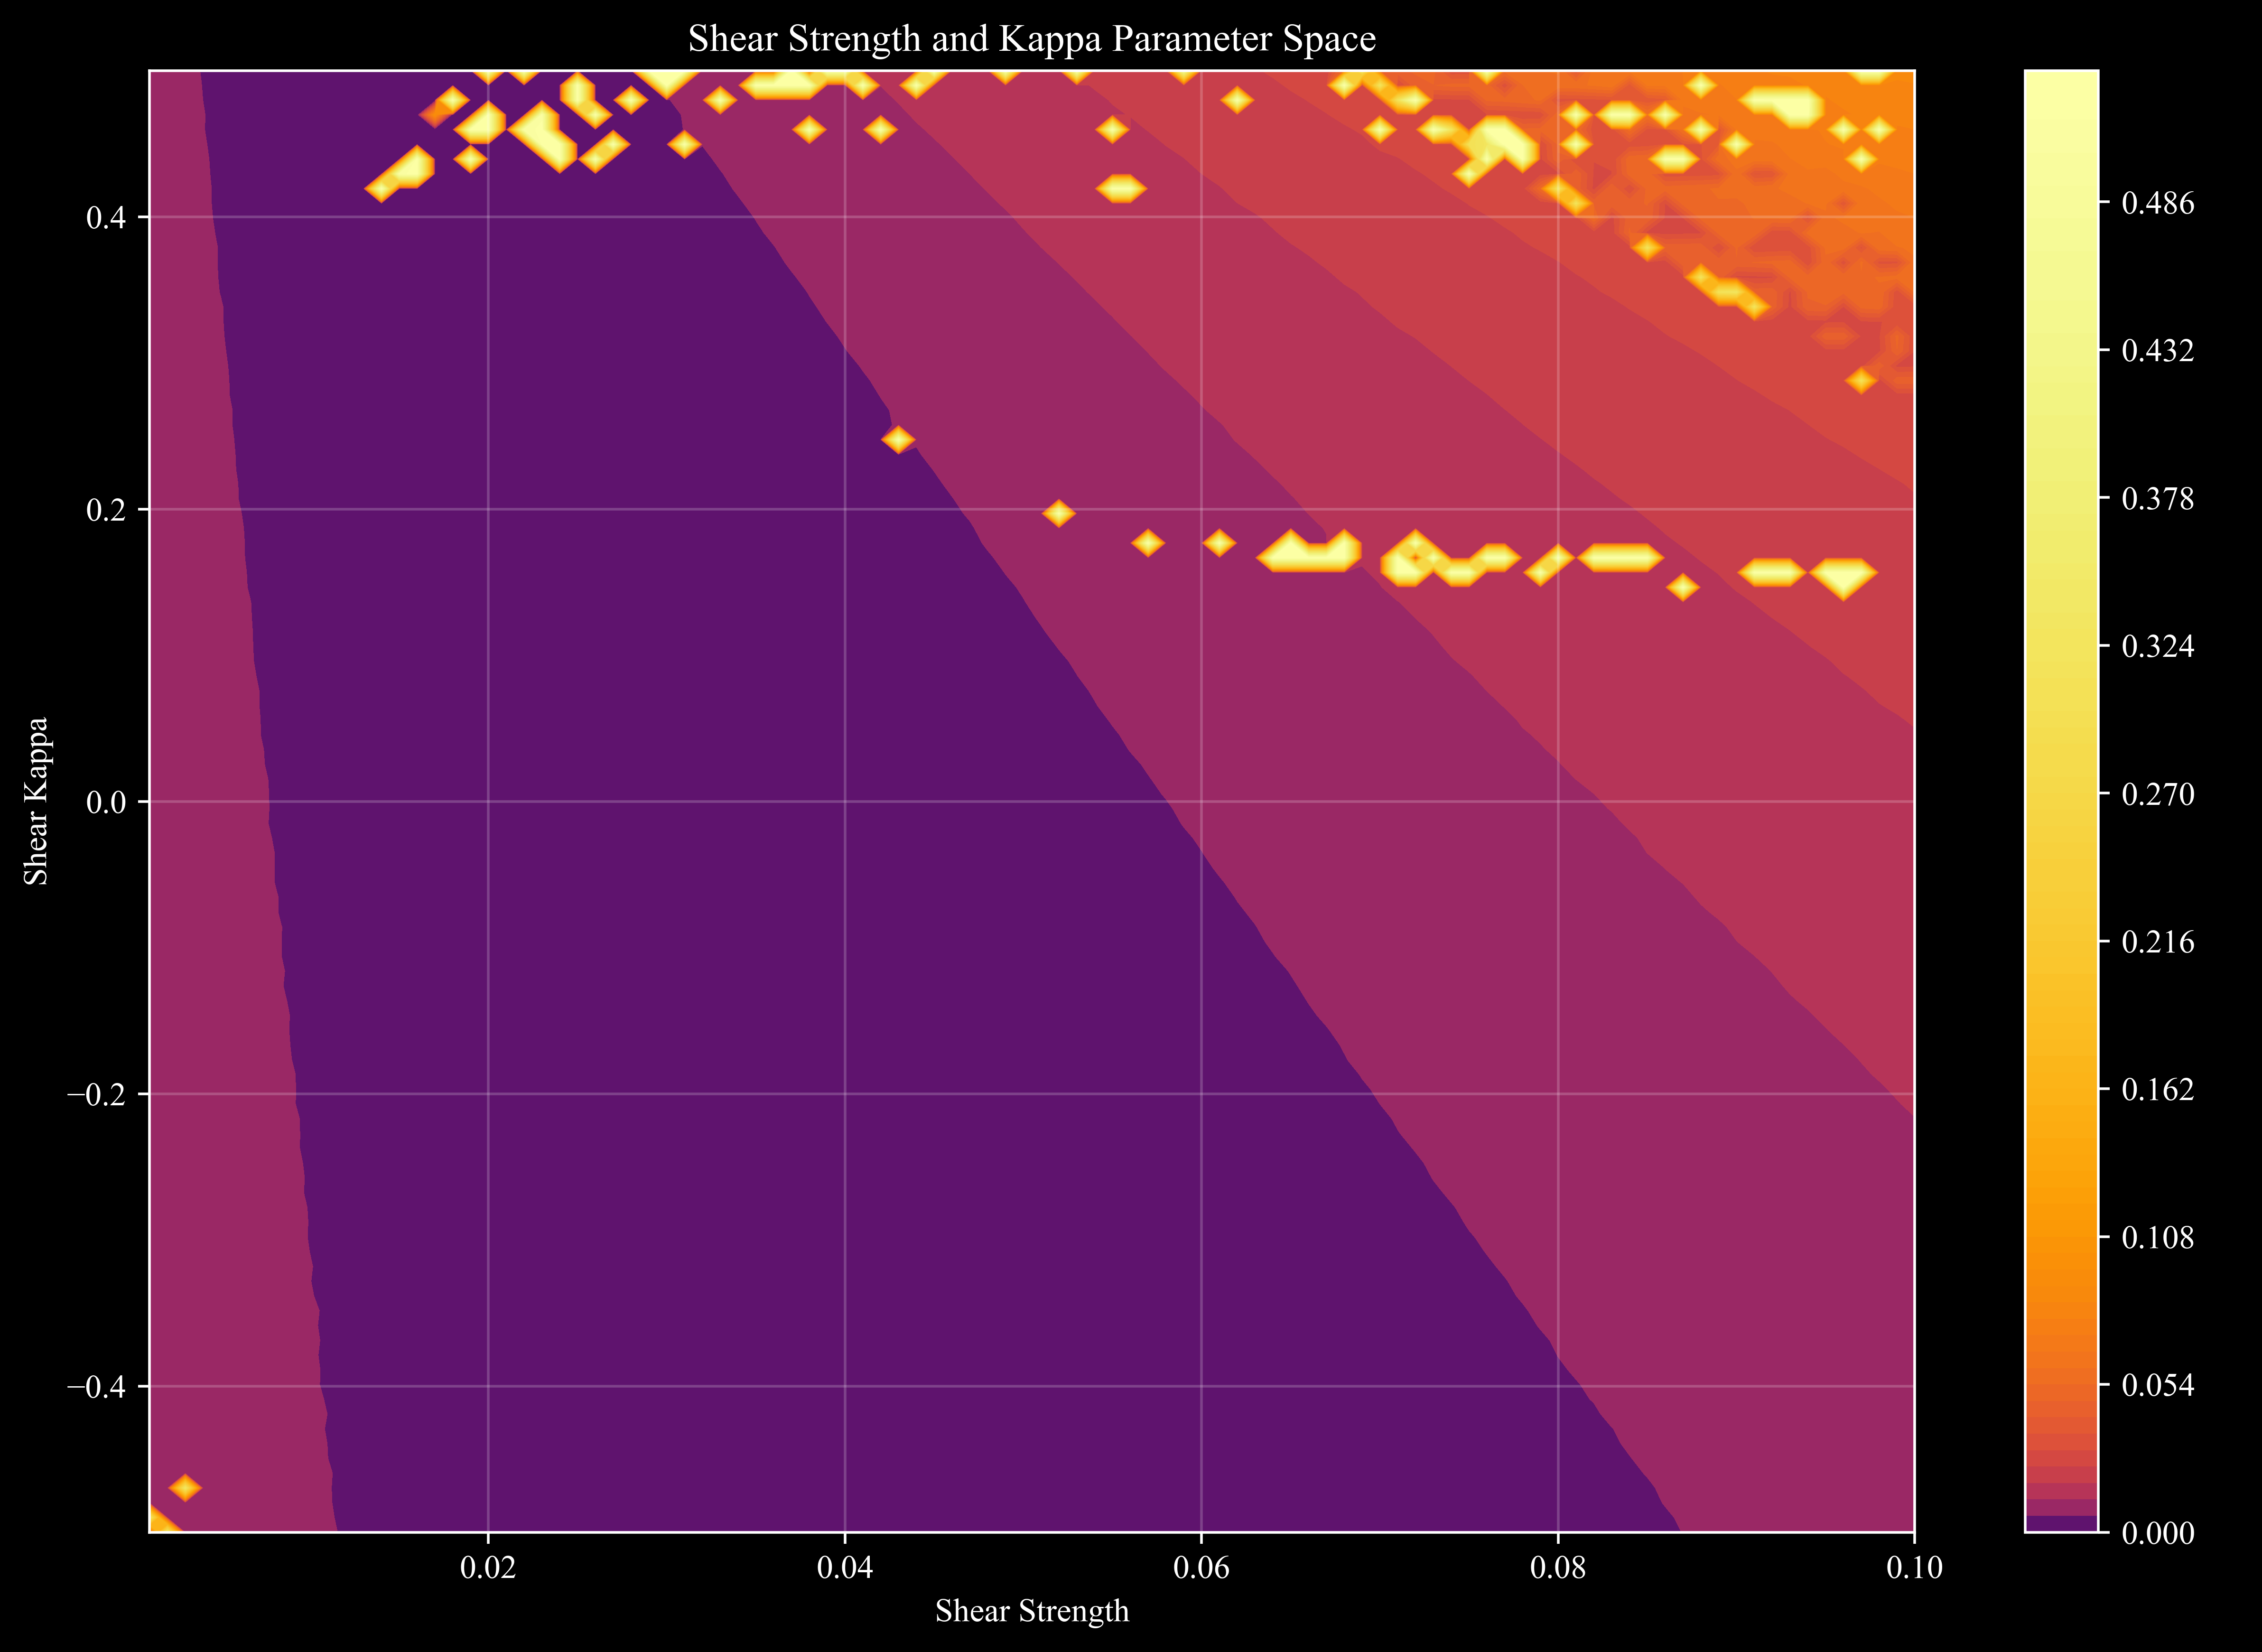

In [37]:
# Create the contour plot
plt.figure(figsize=(12, 8))

# Create the contour plot using the same data
contour = plt.contourf(xi, yi, zi, levels=100, cmap='inferno', norm=norm)

# Add a colorbar
plt.colorbar(contour, label='Position RMS')

# Set labels and title
plt.xlabel('Shear Strength', color = 'w')
plt.ylabel('Shear Kappa', color = 'w')
plt.title('Shear Strength and Kappa Parameter Space', color = 'w')

# Set the style for dark theme
plt.style.use('dark_background')
plt.grid(True, alpha=0.2)

# Show the plot
plt.show()


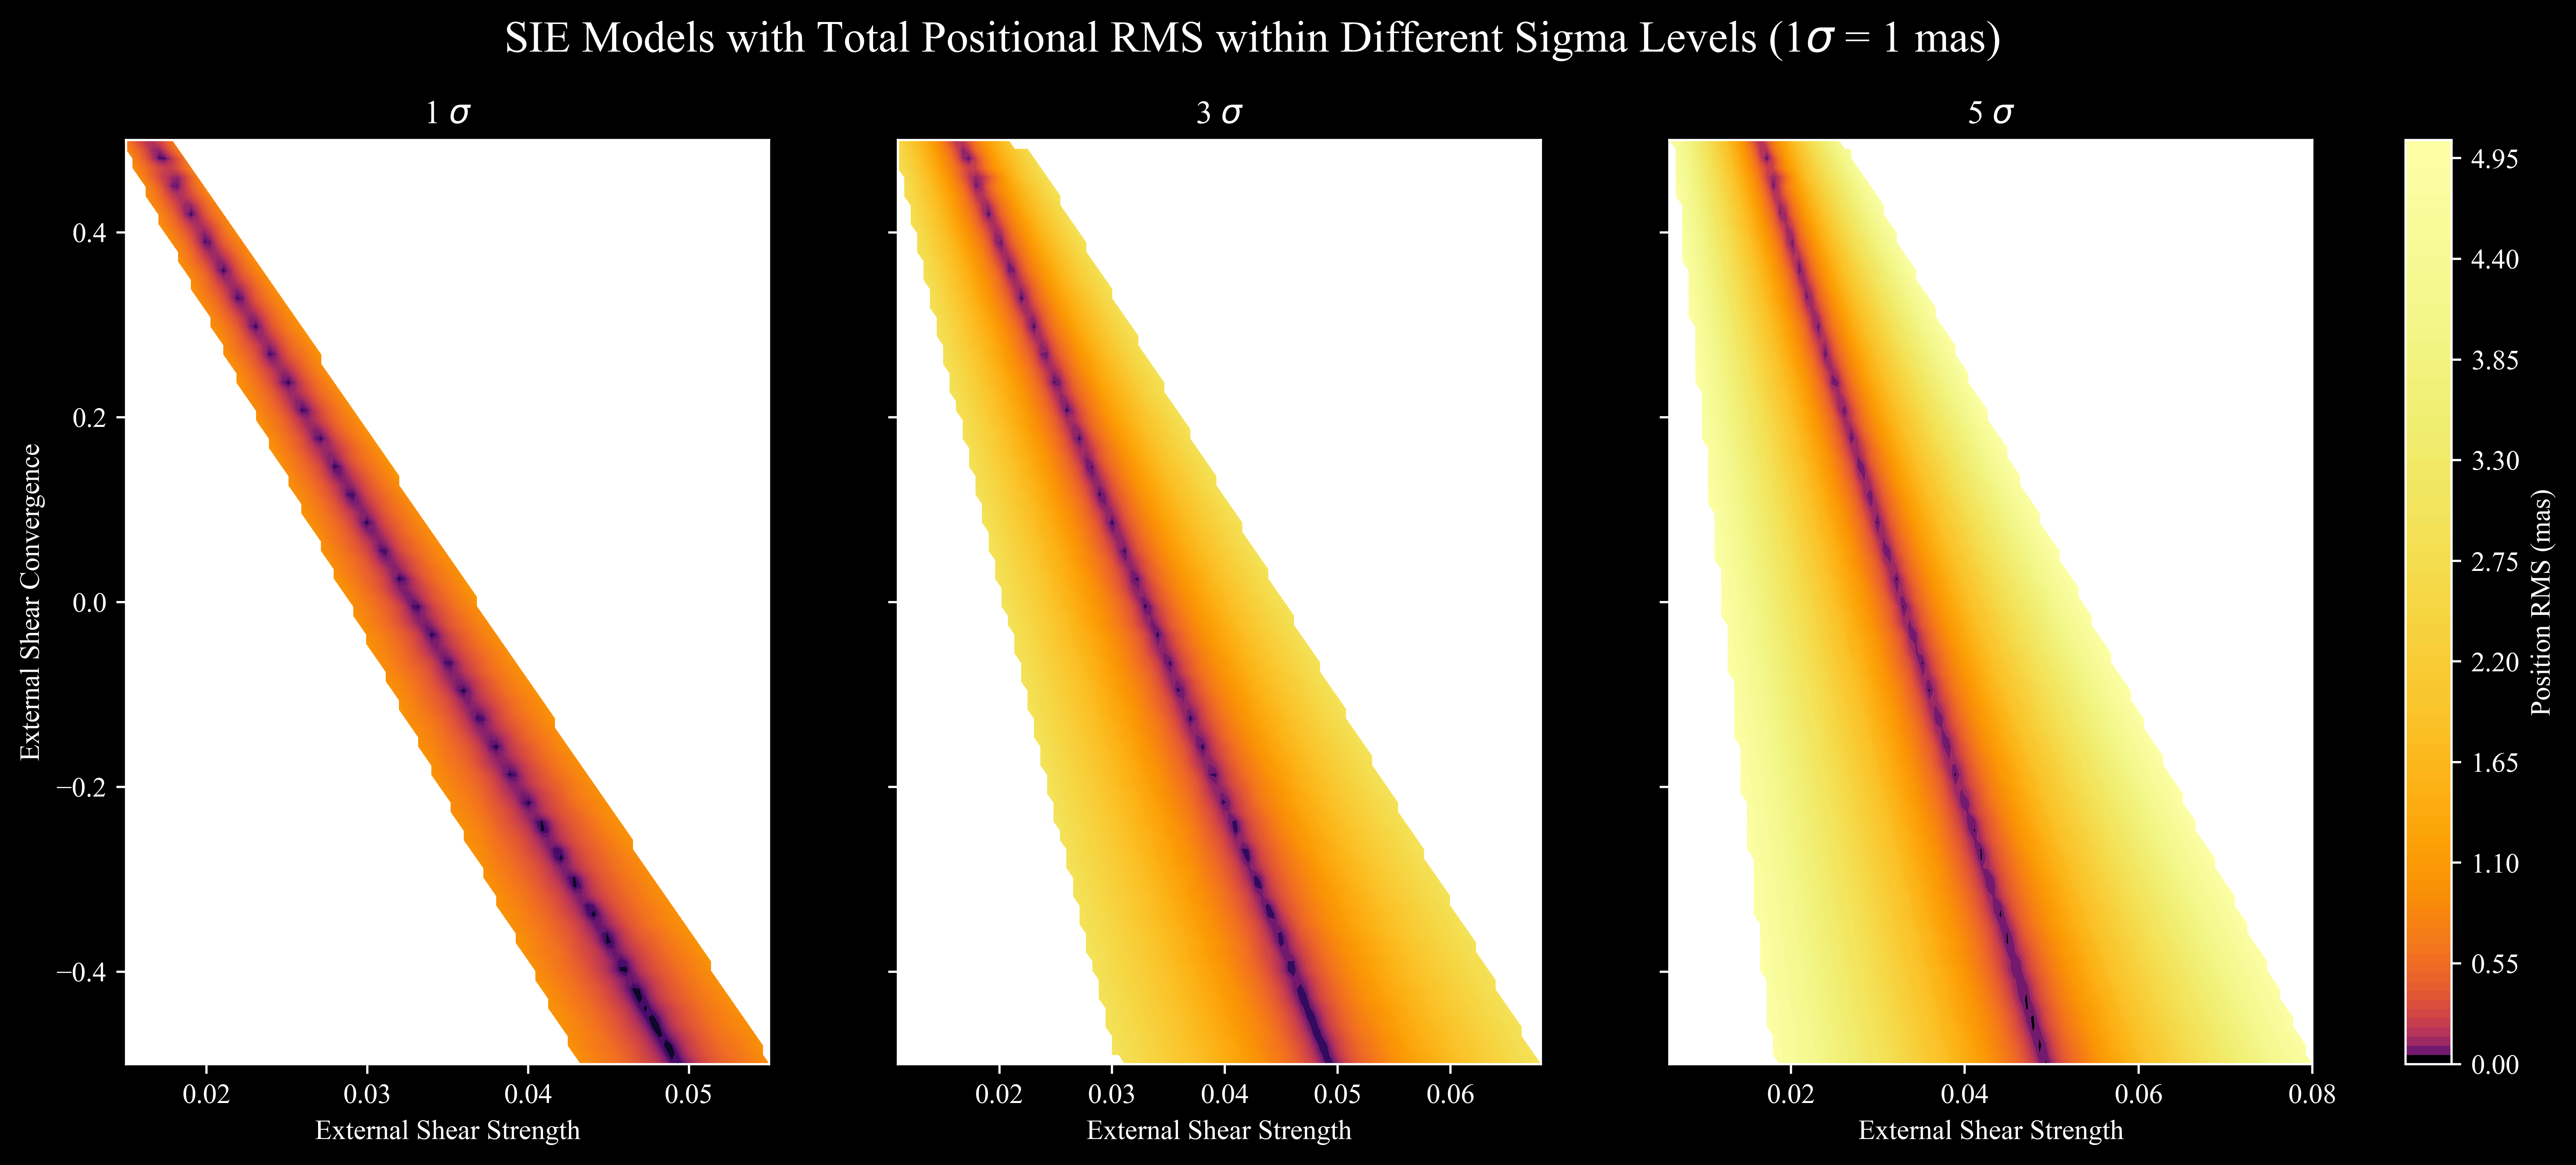

In [54]:
one_sigma = 0.001
sigma_levels = [1, 3, 5]
vmin = np.nanmin(zi[zi>0])
vmax = np.nanmax(zi)
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=LogStretch())

# Create a figure with subplots
fig, axes = plt.subplots(1, len(sigma_levels), figsize=(15, 6), sharey=True)

for i, ax in enumerate(axes):
    # Filter data based on sigma level
    mask = (df['pos_rms'] <= one_sigma * sigma_levels[i])
    filtered_df = df[mask]
    
    # Create grid for contour plot
    xi = np.linspace(filtered_df['PERT_$\gamma$'].min(), filtered_df['PERT_$\gamma$'].max(), 100)
    yi = np.linspace(filtered_df['PERT_$\kappa$'].min(), filtered_df['PERT_$\kappa$'].max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    
    # Interpolate z values
    zi = griddata((filtered_df['PERT_$\gamma$'], filtered_df['PERT_$\kappa$']), 
                 filtered_df['pos_rms'], (xi, yi), method='cubic')
    
    # Create contour plot using the common norm
    contour = ax.contourf(xi, yi, zi, levels=100, cmap='inferno', norm=norm)
    
    ax.set_title(f'{sigma_levels[i]} $\sigma$', color='w')
    ax.set_xlabel('External Shear Strength', color='w')
    if i == 0:
        ax.set_ylabel('External Shear Convergence', color='w')
    ax.set_facecolor('white')
    ax.tick_params(colors='w')
    # ax.grid(True, alpha=0.2, color='k')

# Add common colorbar
import matplotlib.ticker as ticker
cbar = fig.colorbar(contour, ax=axes, label='Position RMS (mas)', orientation='vertical', fraction=0.02, pad=0.04, format=ticker.FuncFormatter(lambda x, pos: f'{x*1000:.2f}'))
cbar.ax.yaxis.label.set_color('w')
cbar.ax.tick_params(colors='w')
plt.suptitle('SIE Models with Total Positional RMS within Different Sigma Levels (1$\sigma$ = 1 mas)', color='w', fontsize=16)
plt.show()

/var/folders/tm/964hg0yn70x0ddsqcj4bsf8r0000gn/T/ipykernel_30915/2547431942.py:23: UserWarning: Adding colorbar to a different Figure <Figure size 7500x2500 with 4 Axes> than <Figure size 7500x2500 with 4 Axes> which fig.colorbar is called on.
  cbar = fig.colorbar(contour, ax=axes, label='Position RMS')


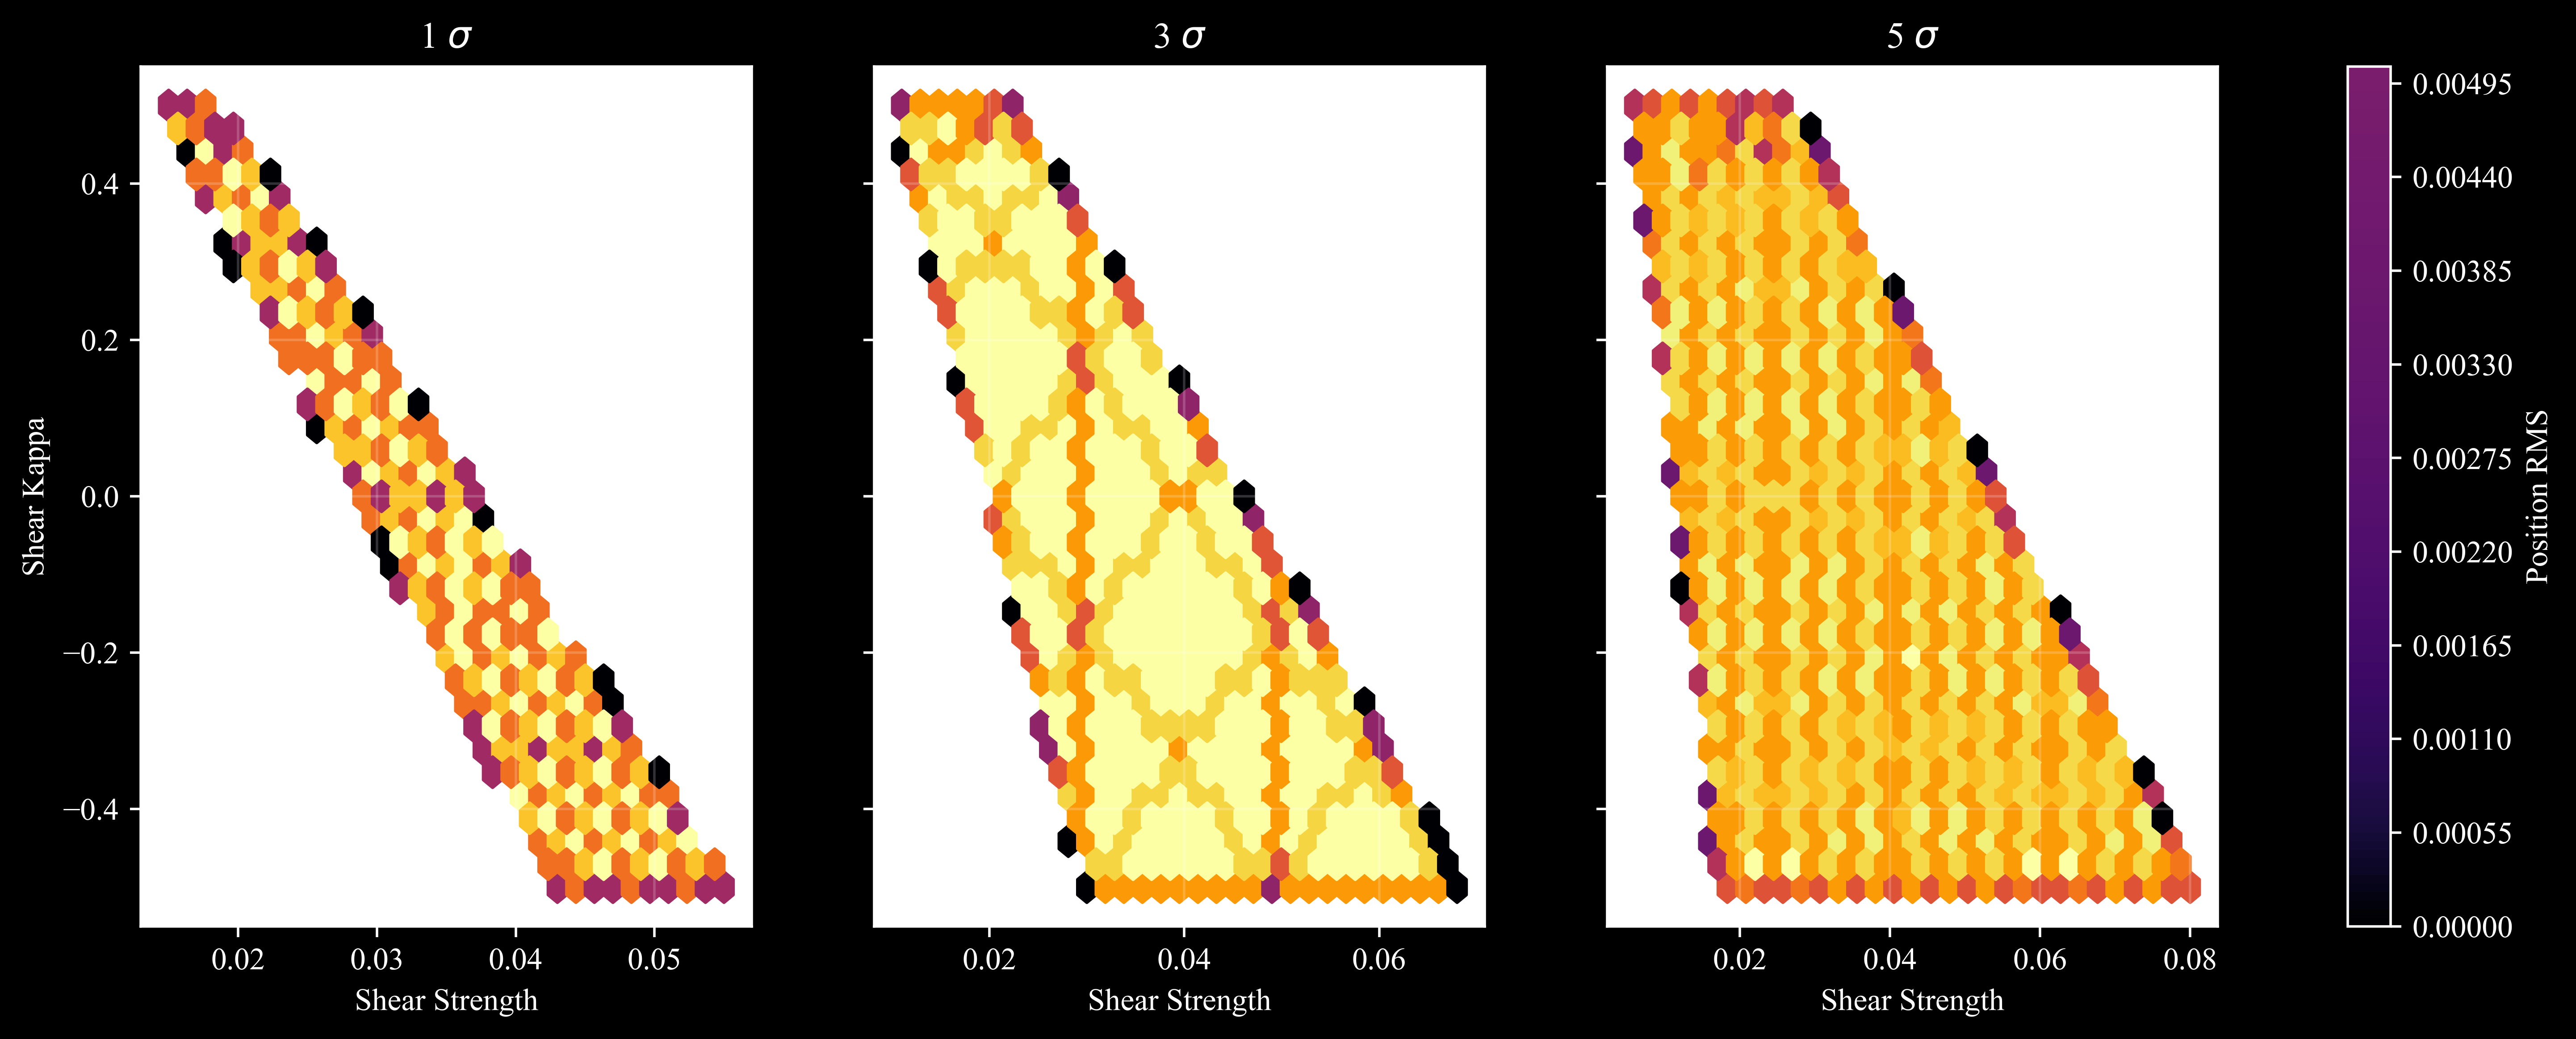

In [39]:
one_sigma = 0.001
sigma_levels = [1, 3, 5]

# Create a figure with subplots
fig, axes = plt.subplots(1, len(sigma_levels), figsize=(15, 5), sharey=True)

for i, ax in enumerate(axes):
    # Filter data based on sigma level
    mask = (df['pos_rms'] <= one_sigma * sigma_levels[i])
    filtered_df = df[mask]
    
    ax.hexbin(filtered_df['PERT_$\gamma$'], filtered_df['PERT_$\kappa$'], gridsize=30, cmap='inferno', mincnt=1, bins='log')
    
    ax.set_title(f'{sigma_levels[i]} $\sigma$', color='w')
    ax.set_xlabel('Shear Strength', color='w')
    if i == 0:
        ax.set_ylabel('Shear Kappa', color='w')
    ax.set_facecolor('white')
    ax.tick_params(colors='w')
    ax.grid(True, alpha=0.2)

# Add common colorbar
cbar = fig.colorbar(contour, ax=axes, label='Position RMS')
cbar.ax.yaxis.label.set_color('w')
cbar.ax.tick_params(colors='w')

plt.show()